In [107]:
import pymagicc
from pymagicc import MAGICC6
from pymagicc.scenarios import rcp26, rcp45, rcp60, rcp85
from pymagicc.io import MAGICCData

from copy import deepcopy

import numpy as np
import pandas as pd


In [20]:
# Combine the four standard scenarios into one

# rcps = rcp26.copy()
# for rcp in [rcp26, rcp45, rcp60, rcp85]:
#     rcps.append(rcp)

rcps = deepcopy(rcp26)
for rcp in [rcp45, rcp60, rcp85]:
    rcps = rcps.append(rcp)

In [59]:
with MAGICC6() as magicc:
    results = magicc.run(rcp26)
    for rcp in [rcp45, rcp60, rcp85]:
        results.append(magicc.run(rcp), inplace=True)

In [61]:
# results.meta['model'].drop_duplicates()
# help(rcp26.append)
results.to_csv('rcps.csv')

In [64]:
rcps_df = pd.read_csv('rcps.csv')

In [82]:
filtered_df = rcps_df[(rcps_df.region == 'World') & (rcps_df.variable == 'Radiative Forcing')]

In [83]:
filtered_df_1 = filtered_df.drop(['climate_model', 'model', 'region', 'todo', 'unit', 'variable'], axis=1)

In [97]:
columns_list = list(filtered_df_1.columns[1:])

In [124]:
df = filtered_df_1.T.reset_index().drop(0)
df.

In [144]:
df.columns = ['year', 'rcp26', 'rcp45', 'rcp60', 'rcp85']

In [157]:
# df['year'] = df['year'].str.slice(0,4)
df['year'] = df['year'].astype('datetime64[ns]')

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline
df

,year,rcp26,rcp45,rcp60,rcp85
1,1765,0,0,0,0
2,1766,0.0196089,0.0196089,0.0196089,0.0196089
3,1767,0.0615656,0.0615656,0.0615656,0.0615656
4,1768,0.0312872,0.0312872,0.0312872,0.0312872
5,1769,-0.0120852,-0.0120852,-0.0120852,-0.0120852
...,...,...,...,...,...
332,2096,2.615,4.22536,5.39806,8.0641
333,2097,2.60898,4.22965,5.41968,8.12729
334,2098,2.60304,4.23411,5.4415,8.18998
335,2099,2.59716,4.23875,5.46347,8.252


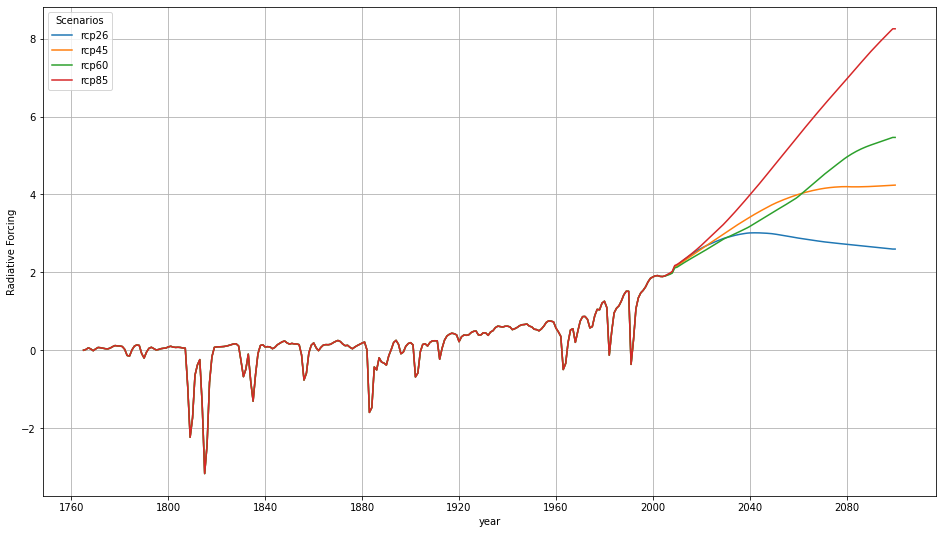

In [163]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
ax.plot(df['year'], df['rcp26'], label='rcp26')
ax.plot(df['year'], df['rcp45'], label='rcp45')
ax.plot(df['year'], df['rcp60'], label='rcp60')
ax.plot(df['year'], df['rcp85'], label='rcp85')
ax.legend(title='Scenarios')
ax.set_xlabel('year')
ax.set_ylabel('Radiative Forcing')
ax.grid()
plt.show()